In [1]:
import qstock
import numpy as np
import pandas as pd

# 510880：红利ETF，代表价值
# 159915：创业板ETF，代表成长
# 513100：纳指ETF，代表外盘
# 518880：黄金ETF，代表商品
pool_list = ['510880', '159915', '513100', '518880']
start_date = '20130729'
# fqt:复权类型，0：不复权，1：前复权；2：后复权
data = qstock.get_price(pool_list, start=start_date, freq='d', fqt=2).sort_index()
name_list = data.columns.tolist()
data.head(10)

,纳指ETF,黄金ETF,红利ETF,创业板ETF
date,,,,
2013-07-29,1.015,2.626,1.808,1.124
2013-07-30,1.011,2.646,1.827,1.110
2013-07-31,1.013,2.657,1.832,1.122
2013-08-01,1.014,2.643,1.861,1.177
2013-08-02,1.023,2.578,1.856,1.169
2013-08-05,1.031,2.630,1.870,1.193
2013-08-06,1.030,2.591,1.879,1.196
2013-08-07,1.017,2.574,1.868,1.162
2013-08-08,1.018,2.586,1.862,1.171


In [2]:
# 动量长度
N = 20
# 计算每日涨跌幅和N日涨跌幅
for name in name_list:
    data['日收益率_'+name] = data[name] / data[name].shift(1) - 1.0
    data['涨幅_'+name] = data[name] / data[name].shift(N+1) - 1.0
# 去掉缺失值
data = data.dropna()
data[['涨幅_'+v for v in name_list]].head(10)

,涨幅_纳指ETF,涨幅_黄金ETF,涨幅_红利ETF,涨幅_创业板ETF
date,,,,
2013-08-27,0.001970,0.058264,0.073009,0.093416
2013-08-28,-0.014837,0.068405,0.056924,0.089189
2013-08-29,-0.010859,0.052315,0.052948,0.075758
2013-08-30,-0.004931,0.054484,0.036002,-0.005098
2013-09-02,-0.010753,0.073313,0.040948,0.023952
2013-09-03,-0.015519,0.050190,0.048128,0.017603
2013-09-04,-0.016505,0.075646,0.042576,0.015886
2013-09-05,0.001967,0.068765,0.047645,0.074010
2013-09-06,-0.001965,0.053751,0.058002,0.077711


In [3]:
# 取出每日涨幅最大的证券
data['信号'] = data[['涨幅_'+v for v in name_list]].idxmax(axis=1).str.replace('涨幅_', '')
# 今日的涨幅由昨日的持仓产生
data['信号'] = data['信号'].shift(1)
data = data.dropna()
data['轮动策略日收益率'] = data.apply(lambda x: x['日收益率_'+x['信号']], axis=1) 
# 第一天尾盘交易，当日涨幅不纳入
data.loc[data.index[0],'轮动策略日收益率'] = 0.0
data['轮动策略净值'] = (1.0 + data['轮动策略日收益率']).cumprod()
data[['涨幅_'+v for v in name_list]+['信号','轮动策略日收益率','轮动策略净值']].head(10)

,涨幅_纳指ETF,涨幅_黄金ETF,涨幅_红利ETF,涨幅_创业板ETF,信号,轮动策略日收益率,轮动策略净值
date,,,,,,,
2013-08-28,-0.014837,0.068405,0.056924,0.089189,创业板ETF,0.000000,1.000000
2013-08-29,-0.010859,0.052315,0.052948,0.075758,创业板ETF,-0.001654,0.998346
2013-08-30,-0.004931,0.054484,0.036002,-0.005098,创业板ETF,-0.029826,0.968569
2013-09-02,-0.010753,0.073313,0.040948,0.023952,黄金ETF,-0.007176,0.961618
2013-09-03,-0.015519,0.050190,0.048128,0.017603,黄金ETF,-0.001807,0.959881
2013-09-04,-0.016505,0.075646,0.042576,0.015886,黄金ETF,0.009051,0.968569
2013-09-05,0.001967,0.068765,0.047645,0.074010,黄金ETF,-0.012917,0.956058
2013-09-06,-0.001965,0.053751,0.058002,0.077711,创业板ETF,0.011218,0.966783
2013-09-09,0.000000,0.053517,0.116129,0.080965,创业板ETF,-0.005547,0.961420


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/mistletoe/miniconda3/envs/examples/lib/

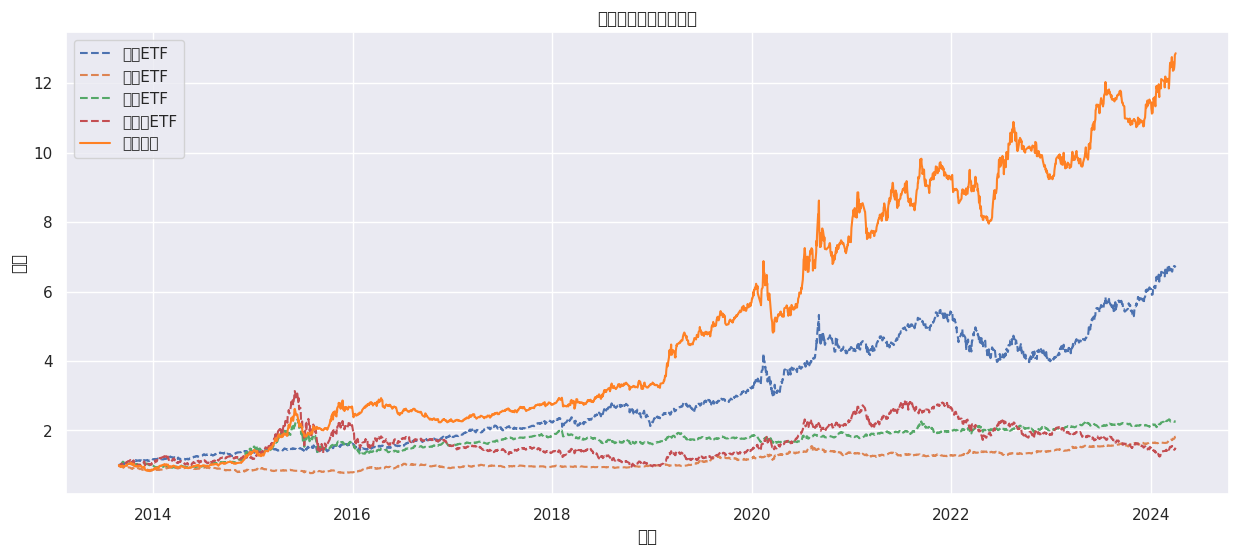

In [4]:
import matplotlib.pyplot as plt

# 显示中文设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 绘制净值曲线图
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel('日期')
ax.set_ylabel('净值')
for name in name_list+['轮动策略']:
    if name in name_list:
        data[name+'净值'] = data[name]/data[name].iloc[0]
        ax.plot(data[name+'净值'].index, data[name+'净值'].values, linestyle='--')
    else:
        ax.plot(data[name+'净值'].index, data[name+'净值'].values, linestyle='-', color='#FF8124')

# 显示图例和标题
ax.legend(name_list+['轮动策略'])
ax.set_title('轮动策略净值曲线对比')

plt.show()

/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/quantstats/_plotting/core.py:385: UserWarning: Glyph 32435 (\N{CJK UNIFIED IDEOGRAPH-7EB3}) missing from current font.
  fig.tight_layout()
/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/quantstats/_plotting/core.py:385: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.tight_layout()
/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/quantstats/_plotting/core.py:385: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.tight_layout()
/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/quantstats/_plotting/core.py:385: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.tight_layout()
/Users/mistletoe/miniconda3/envs/examples/lib/python3.11/site-packages/quantstats/_plotting/core.py:391: UserWarning: Glyph 32435 (\N{CJK UNIFIED IDEOGRAPH-

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2013-08-29   2013-08-29
End Period          2024-04-01   2024-04-01
Risk-Free Rate      0.0%         0.0%
Time in Market      98.0%        99.0%

Cumulative Return   573.69%      1,186.22%
CAGR﹪              13.23%       18.11%

Sharpe              1.0          1.17
Prob. Sharpe Ratio  99.92%       99.99%
Sortino             1.44         1.73
Sortino/√2          1.02         1.23
Omega               1.25         1.25

Max Drawdown        -28.57%      -30.3%
Longest DD Days     569          651

Gain/Pain Ratio     0.2          0.25
Gain/Pain (1M)      1.27         1.42

Payoff Ratio        0.97         1.0
Profit Factor       1.2          1.25
Common Sense Ratio  1.33         1.53
CPC Index           0.62         0.66
Tail Ratio          1.11         1.23
Outlier Win Ratio   4.39         3.87
Outlier Loss Ratio  4.33         4.15

MTD                 0.37%        0.43%
3M          

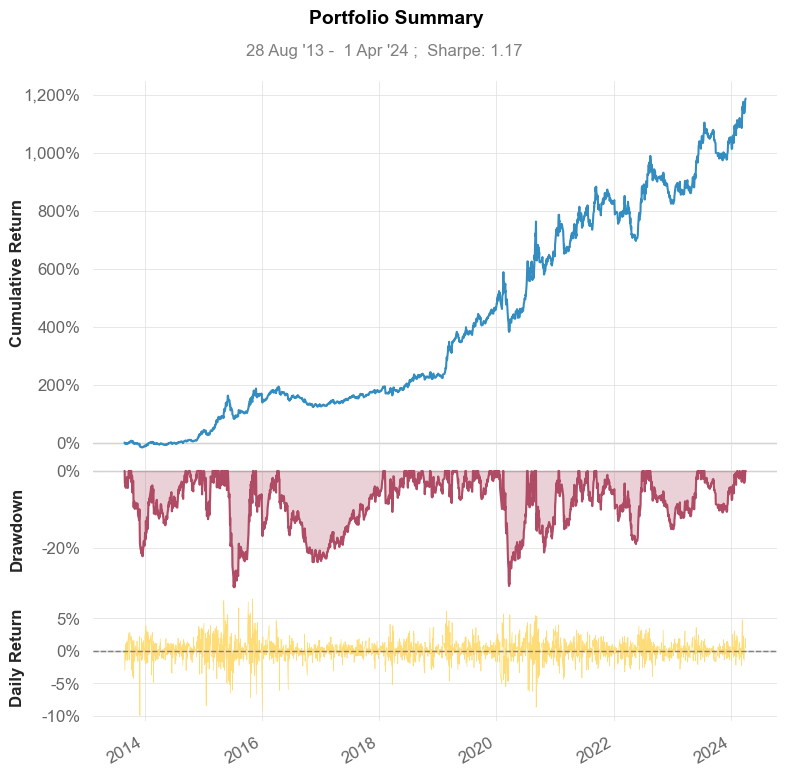

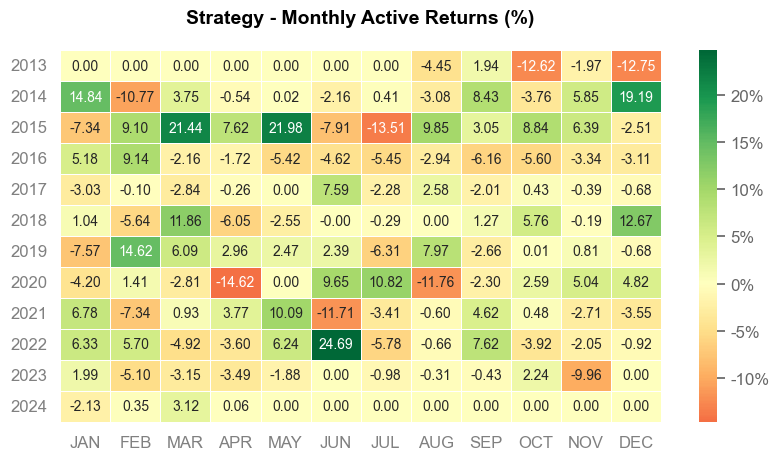

In [5]:
import quantstats as qstat

#将完整回测报告存为HTML文件
qstat.reports.html(data['轮动策略净值'], benchmark=data['纳指ETF净值'],
                  title='轮动策略回测报告',
                  download_filename='轮动策略回测报告.html') 
#输出基本回测报告信息
qstat.reports.basic(data['轮动策略净值'], benchmark=data['纳指ETF净值']) 